In [10]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("GlobalLandTemperaturesByCity.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [11]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [19]:
#  how has the average temperature in a city changed over the years
df['dt'] = pd.to_datetime(df['dt']) #convert into datetime
df['Year'] = df['dt'].dt.year # Extract the year from 'dt'
df = df.dropna(subset=['AverageTemperature']) #subset=['AverageTemperature']: This tells pandas to only check for NaN values in the AverageTemperature column. 
#  It will drop any rows where the AverageTemperature is missing, 
# while keeping other rows that might have missing values in different column


In [23]:
avg = df.groupby(['City', 'Year'])['AverageTemperature'].mean().reset_index()


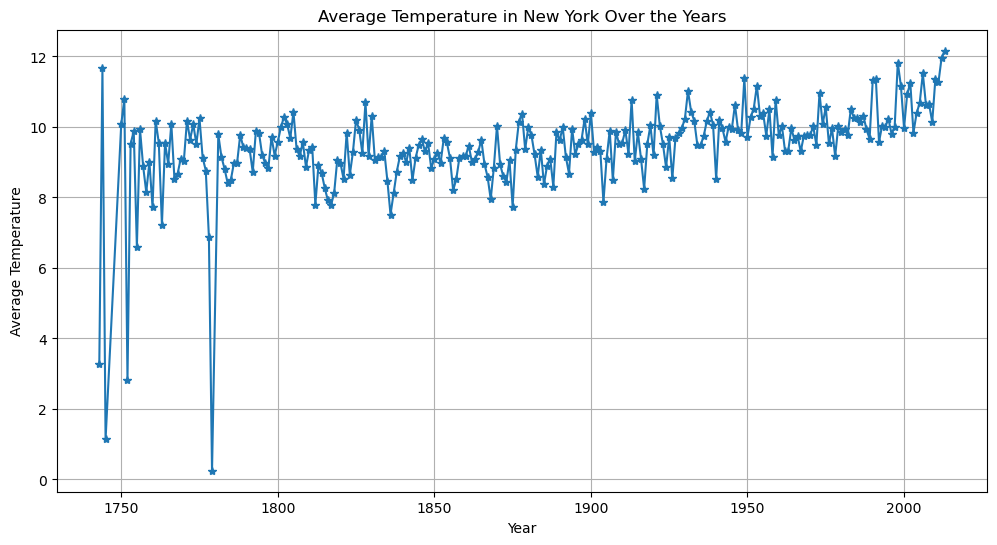

In [25]:
import matplotlib.pyplot as plt
city_data = avg[avg['City'] == 'New York']
plt.figure(figsize=(12, 6))
plt.plot(city_data['Year'], city_data['AverageTemperature'],marker='*')
plt.title('Average Temperature in New York Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()


Text(0, 0.5, 'Average Temperature')

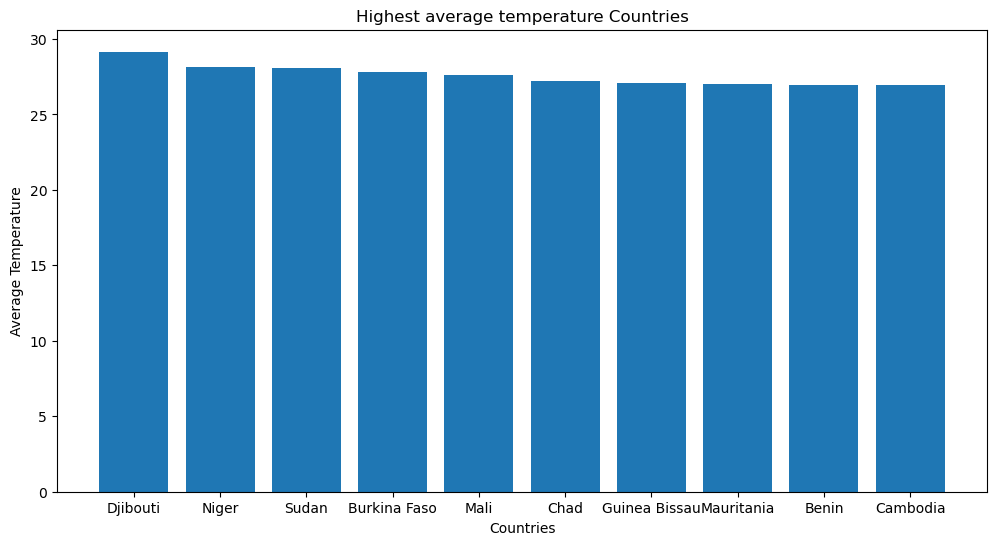

In [29]:
# which countries had the highest average temperature in the dataset

avg= df.groupby('Country')['AverageTemperature'].mean().reset_index()
avg=avg.dropna()
avg_temp= avg.sort_values(by='AverageTemperature', ascending=False)#to arrange them in descending order
top= avg_temp.head(10) 
plt.figure(figsize=(12, 6))
plt.bar(top['Country'],top['AverageTemperature'])
plt.title('Highest average temperature Countries')
plt.xlabel('Countries')
plt.ylabel('Average Temperature')


Text(0, 0.5, 'Frequency')

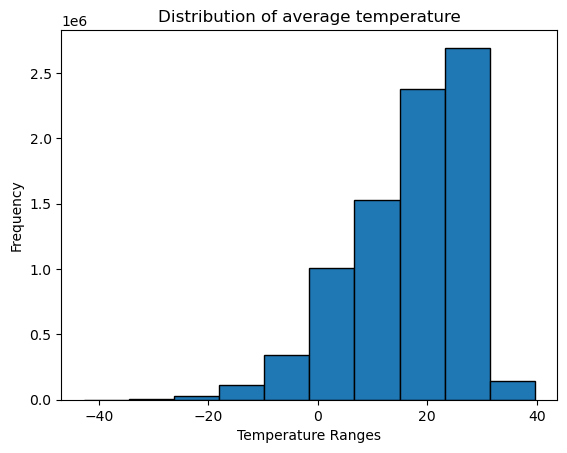

In [58]:
# what is the distribution of average temperature across all data 
plt.hist(df['AverageTemperature'].dropna(),bins=10,edgecolor='black')
plt.title("Distribution of average temperature")
plt.xlabel('Temperature Ranges')
plt.ylabel('Frequency')

Correlation between Average Temperature and Uncertainty: -0.22815882281296318


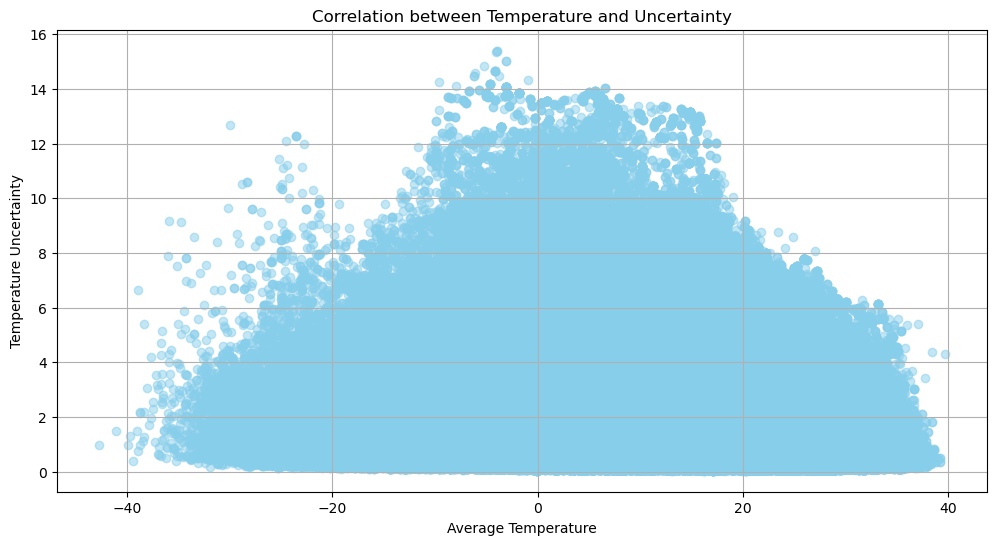

In [60]:
# Is there a correlation between temperature and uncertainity in dataset
# Calculate the correlation
correlation = df['AverageTemperature'].corr(df['AverageTemperatureUncertainty'])
print(f"Correlation between Average Temperature and Uncertainty: {correlation}")
scatter_data = df[['AverageTemperature', 'AverageTemperatureUncertainty']].dropna()
plt.figure(figsize=(12, 6))
plt.scatter(scatter_data['AverageTemperature'], scatter_data['AverageTemperatureUncertainty'], alpha=0.5, color='skyblue')
plt.title('Correlation between Temperature and Uncertainty')
plt.xlabel('Average Temperature')
plt.ylabel('Temperature Uncertainty')
plt.grid(True)
plt.show()


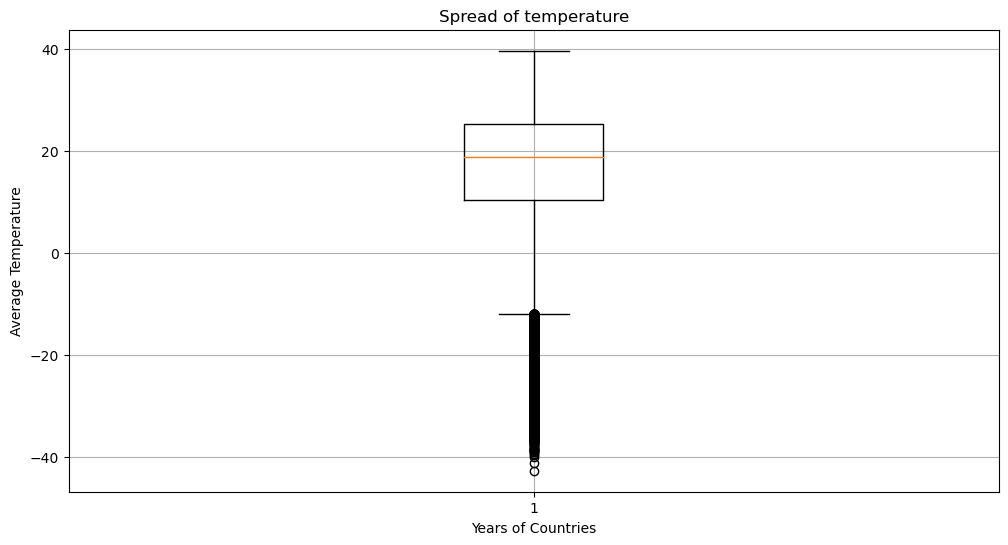

In [66]:
# What is the spread of temperature for a specific country over a given periods
Q1 = df['AverageTemperature'].quantile(0.25)  
Q2 = df['AverageTemperature'].median()        
Q3 = df['AverageTemperature'].quantile(0.75)  
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['AverageTemperature'] < lower_bound) | (df['AverageTemperature'] > upper_bound)]

# Print summary statistics
# print(f"Q1 (25th percentile): {Q1}")
# print(f"Median (50th percentile): {Q2}")
# print(f"Q3 (75th percentile): {Q3}")
# print(f"IQR: {IQR}")
# print(f"Lower Bound for Outliers: {lower_bound}")
# print(f"Upper Bound for Outliers: {upper_bound}")
# print(f"Number of Outliers: {len(outliers)}")

# # Display the outliers
# print("Outliers:")
# print(outliers[['AverageTemperature']])
plt.figure(figsize=(12, 6))
plt.boxplot(df['AverageTemperature'].dropna())
plt.title('Spread of temperature')
plt.xlabel('Years of Countries')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()


<Figure size 2000x1000 with 0 Axes>

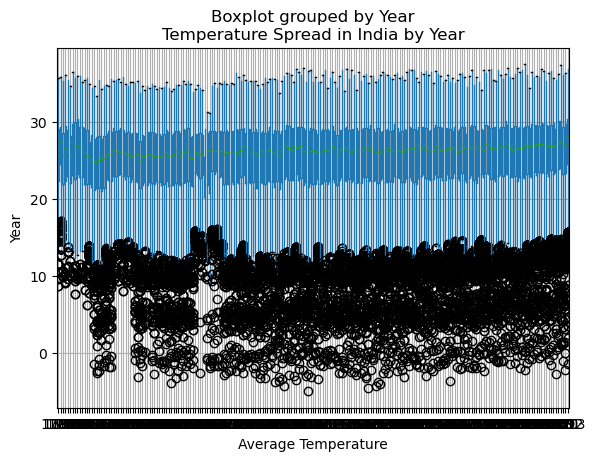

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
country_data = df[df['Country'] == 'India'].copy()
country_data['dt'] = pd.to_datetime(country_data['dt'])
country_data = country_data.dropna(subset=['dt'])
country_data['Year'] = country_data['dt'].dt.year
country_data = country_data[['Year', 'AverageTemperature']].dropna()
plt.figure(figsize=(20,10))
country_data.boxplot(column='AverageTemperature', by='Year')

plt.title('Temperature Spread in India by Year')
# plt.suptitle('')  # To remove the default 'Boxplot grouped by Year' title
plt.xlabel('Average Temperature')
plt.ylabel('Year')
# plt.grid(True)

# Display the plot
plt.show()


In [76]:
pip install seaborn


In [78]:
import seaborn as sns
tips=sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


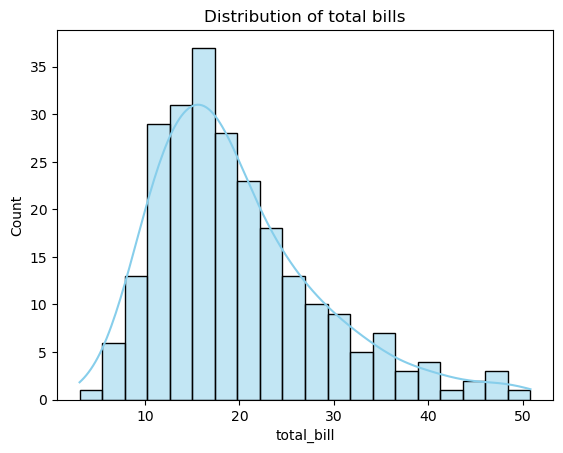

In [83]:
sns.histplot(data=tips,x="total_bill",kde=True,bins=20,color='skyblue')
plt.title("Distribution of total bills")
plt.show()

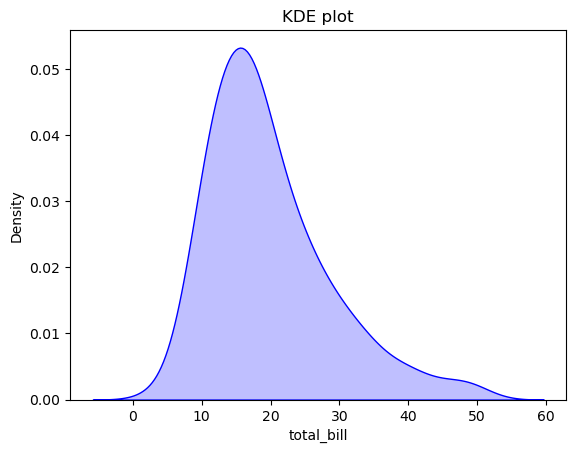

In [85]:
sns.kdeplot(data=tips,x="total_bill",fill=True,color="blue")
plt.title("KDE plot")
plt.show()

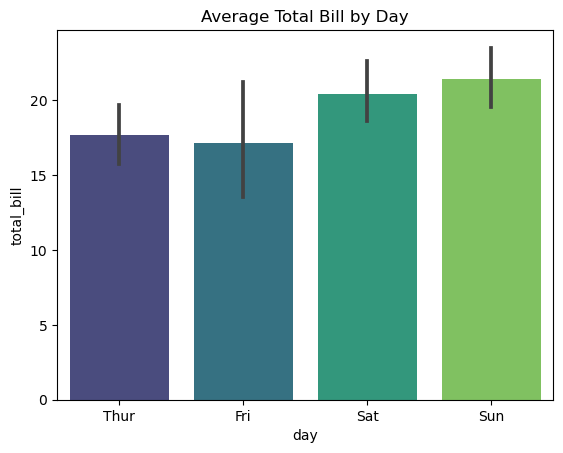

In [89]:
sns.barplot(data=tips,x="day",y="total_bill",palette="viridis")
plt.title("Average Total Bill by Day")
plt.show()

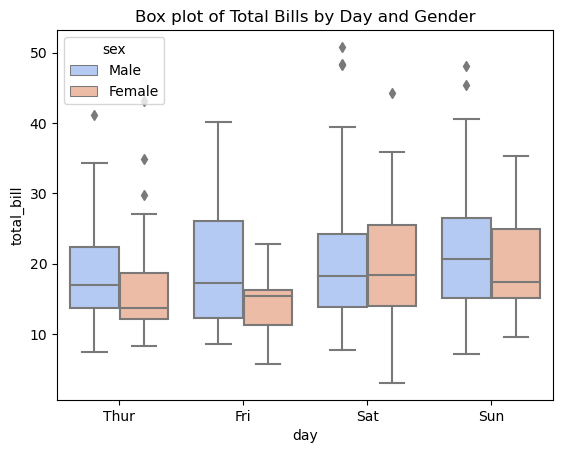

In [90]:
sns.boxplot(data=tips,x="day",y="total_bill",hue="sex",palette="coolwarm")
plt.title("Box plot of Total Bills by Day and Gender")
plt.show()

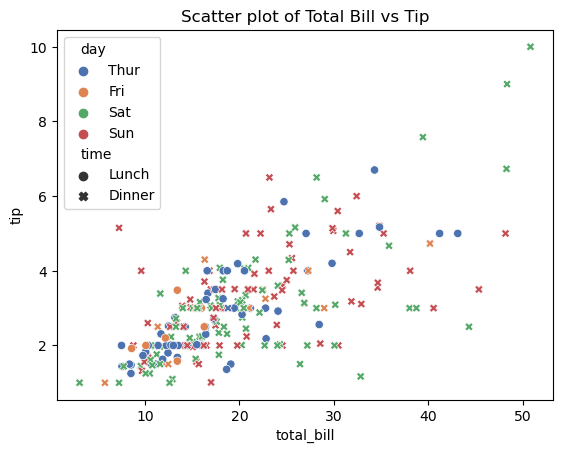

In [91]:
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="day",style="time",palette="deep")
plt.title("Scatter plot of Total Bill vs Tip")
plt.show()

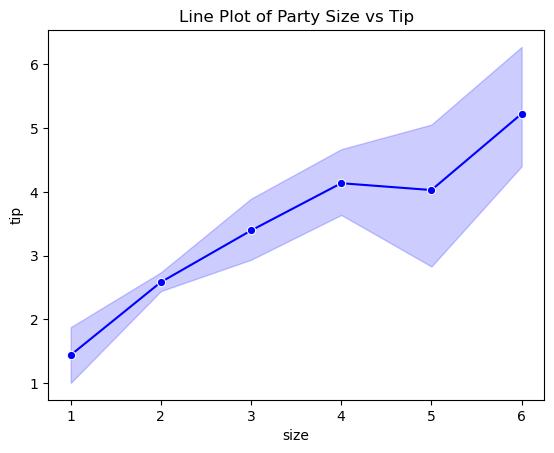

In [93]:
sns.lineplot(data=tips,x="size",y="tip",marker="o",color="blue")
plt.title("Line Plot of Party Size vs Tip")
plt.show()

In [98]:
pip install seaborn --upgrade


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.


C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


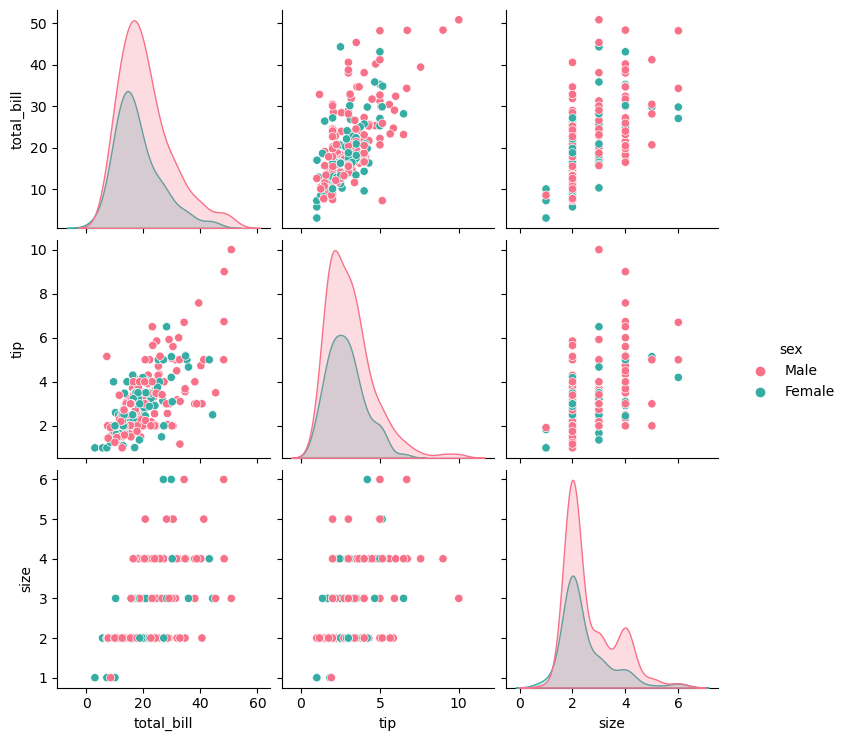

In [99]:
sns.pairplot(data=tips,hue="sex",palette="husl")
plt.show()

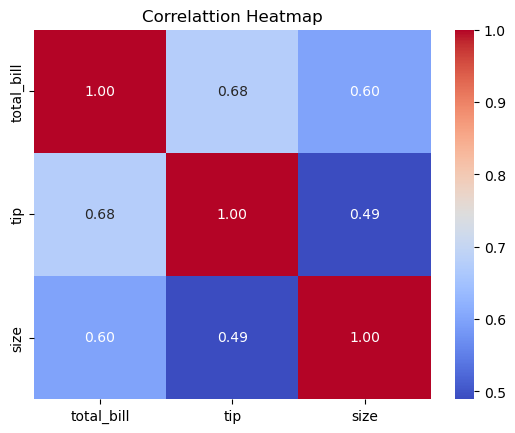

In [102]:
numeric_tips = tips.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_tips.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlattion Heatmap")
plt.show()

In [ ]:
# New Dataset

In [106]:
dt=pd.read_csv("test.csv")
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [107]:
data=pd.read_csv("train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0, 0.5, 'Survival Class')

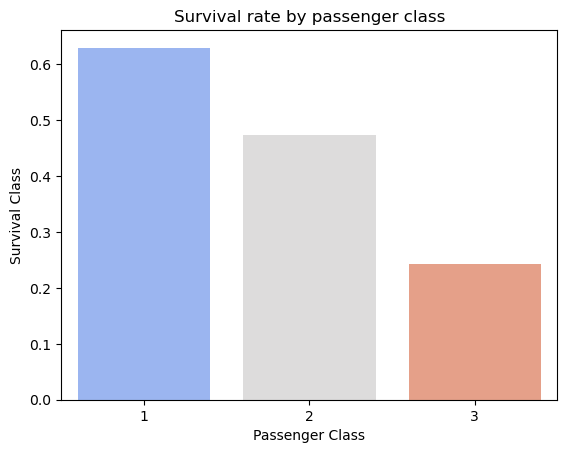

In [110]:
# How does passenger class(Pclass)relate to survival rates
# use bar plot to compare the survival rates aacross different passenger classes
sns.barplot(data=data,x="Pclass",y="Survived",palette="coolwarm",errorbar=None)
plt.title("Survival rate by passenger class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Class")

Text(0.5, 1.0, 'Relationship between Age and Fare')

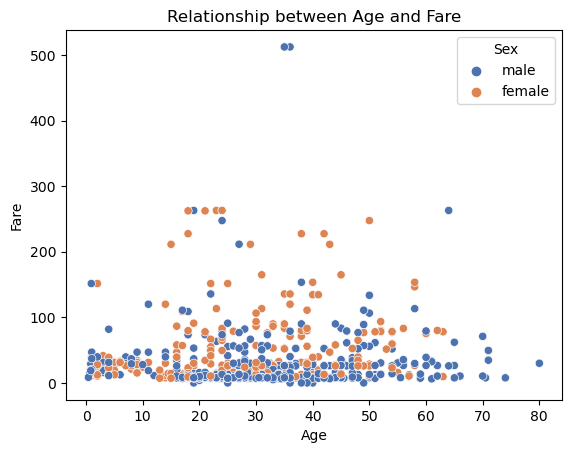

In [115]:
sns.scatterplot(data=data,x="Age",y="Fare",palette="deep",hue="Sex")
plt.title("Relationship between Age and Fare")


C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  """Call fig.tight_layout within rect that exclude the legend."""


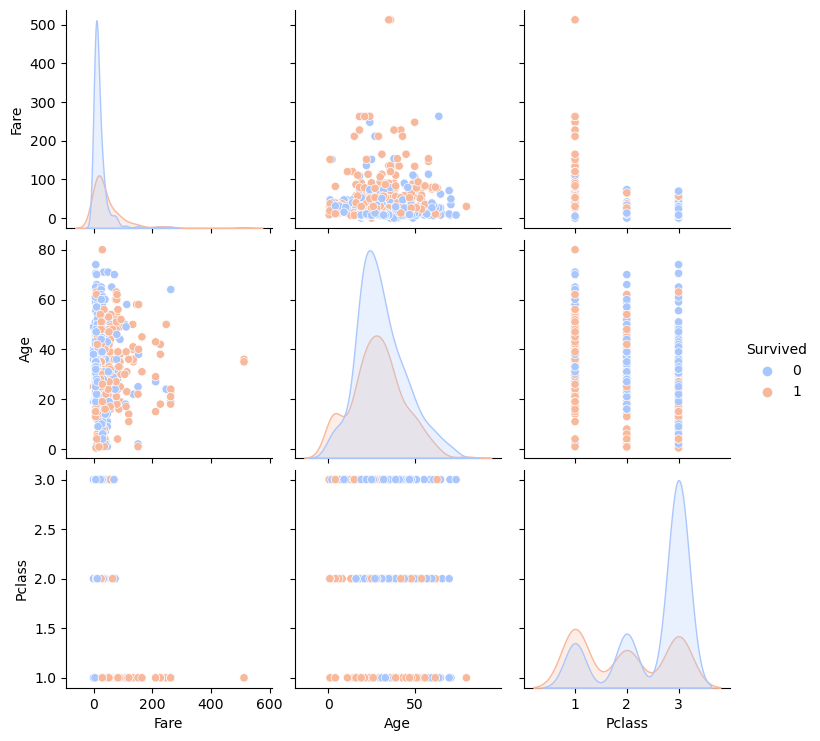

In [124]:
selected_columns = ['Fare', 'Age', 'Pclass', 'Survived']
# filtered_data = data[selected_columns]
sns.pairplot(data[selected_columns], hue="Survived", palette="coolwarm")
plt.show()

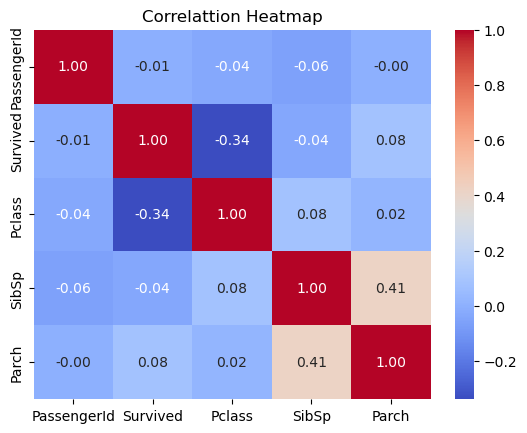

In [127]:
numeric_train = data.select_dtypes(include=['int64'])
correlation_matrix = numeric_train.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlattion Heatmap")
plt.show()

In [128]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [141]:
import numpy as np
arr=np.array([1,2,3])
print(arr)
arr_2d=np.array([[1,2,3],[4,5,6]])
print(arr_2d)

[1 2 3]
[[1 2 3]
 [4 5 6]]


In [133]:
zeros=np.zeros((2,3))
print(zeros)

[[0. 0. 0.]
 [0. 0. 0.]]


In [138]:
rand=np.random.random((2,2))
print(rand)

[[0.17737351 0.14996408]
 [0.82323328 0.20677605]]


In [139]:
id_matrix=np.eye(3)
print(id_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [140]:
range_arr=np.arange(0,10,2)
print(range_arr)

[0 2 4 6 8]


In [158]:
print("Shape:",arr.shape)
print(arr_2d.size)
print(arr_2d.dtype)
print(arr_2d.ndim)
print(arr_2d[:,1:])


Shape: (3,)
6
int32
2
[[2 3]
 [5 6]]


In [201]:
a=np.array([1,2,3,4,5,6])
b=np.array([6,7,8,9,10,11])
print(a+b)
print(a*b)
print(a-b)
print(a/b)

[ 7  9 11 13 15 17]
[ 6 14 24 36 50 66]
[-5 -5 -5 -5 -5 -5]
[0.16666667 0.28571429 0.375      0.44444444 0.5        0.54545455]


In [169]:
c=np.array([[1,2,3],[4,5,6],[7,8,9]])
d=np.array([[3,2,1],[6,5,4],[9,8,7]])
print(c*d)

[[ 3  4  3]
 [24 25 24]
 [63 64 63]]


In [172]:
res=np.dot(c,d)
print(res)

[[ 42  36  30]
 [ 96  81  66]
 [150 126 102]]


<BarContainer object of 5 artists>

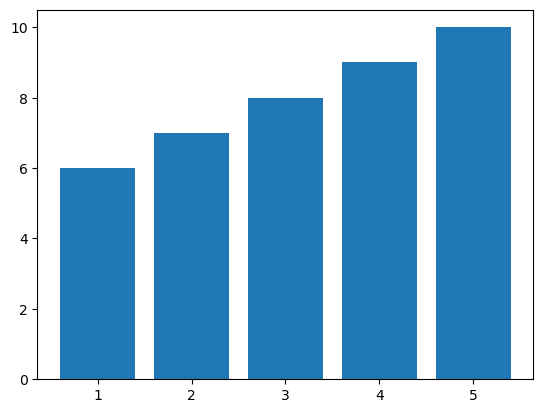

In [174]:
plt.bar(a,b)

In [177]:
print(np.exp(arr))

[ 2.71828183  7.3890561  20.08553692]


In [180]:
print(np.sqrt(a))

[1.         1.41421356 1.73205081 2.         2.23606798]


In [183]:
print("log:",np.log(b))

log: [1.79175947 1.94591015 2.07944154 2.19722458 2.30258509]


In [187]:
#Splitting 
print(np.array_split(a,3))

[array([1, 2]), array([3, 4]), array([5])]


In [188]:
view=arr.view()
view[0]=10
print(arr)

[10  2  3]


In [189]:
# Copying
copy=arr.copy()
copy[0]=49
print(copy)

[49  2  3]


In [195]:
print("Sum: ",np.sum(arr))
print("Mean: ",np.mean(arr))
print("Standard Deviation:",np.std(arr))
print("Maximum Value:",np.max(arr))
print("Minimum value:",np.min(arr))

Sum:  15
Mean:  5.0
Standard Deviation: 3.559026084010437
Maximum Value: 10
Minimum value: 2


In [205]:
# converting from 1d to 2d
reshape=a.reshape(2,3) 
print(reshape)

[[1 2 3]
 [4 5 6]]


In [206]:
#Stacking
aa=np.array([1,2])
bb=np.array([3,4])
print("Vertical: ", np.vstack((aa,bb)))
print("Horizontal: ", np.hstack((aa,bb)))

Vertical:  [[1 2]
 [3 4]]
Horizontal:  [1 2 3 4]
